In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from pathlib import Path
import string
# Load the data
BASE_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
output_path = os.path.join(BASE_DIR, "output", "crawl_stats.csv")
df = pd.read_csv(output_path)

# Combine 'crawl_start' date with 'timestamp' H:M:S to get a proper datetime object
df['datetime'] = pd.to_datetime(
    df['crawl_start'].str.split(' ').str[0] + ' ' + df['timestamp']
)

df.head()

,timestamp,pages_fetched,pages_total,gone,redir_temp,redir_perm,crawl_start,crawl_end,duration_sec,datetime
0,20:58:56,0,0,0,0,0,2026-01-30 20:58:56.649472,2026-01-30 21:18:22.578435,1165.928961,2026-01-30 20:58:56
1,20:59:04,0,1,0,0,0,2026-01-30 20:58:56.649472,2026-01-30 21:18:22.578435,1165.928961,2026-01-30 20:59:04
2,20:59:11,1,83,0,0,0,2026-01-30 20:58:56.649472,2026-01-30 21:18:22.578435,1165.928961,2026-01-30 20:59:11
3,20:59:18,1,83,0,0,0,2026-01-30 20:58:56.649472,2026-01-30 21:18:22.578435,1165.928961,2026-01-30 20:59:18
4,20:59:26,1,83,0,0,0,2026-01-30 20:58:56.649472,2026-01-30 21:18:22.578435,1165.928961,2026-01-30 20:59:26


In [36]:
# 1. Fetch Ratio: How much of the discovered frontier have we actually crawled?
df['fetch_ratio'] = df['pages_fetched'] / df['pages_total'].replace(0, 1)

# 2. Crawl Speed: Pages per minute
# diff() calculates the difference between the current and the previous row
df['pages_diff'] = df['pages_fetched'].diff().fillna(0)
df['time_diff_sec'] = df['datetime'].diff().dt.total_seconds().fillna(0)

# Speed = (Change in Pages / Change in Seconds) * 60 seconds
df['pages_per_min'] = (df['pages_diff'] / df['time_diff_sec'].replace(0, 1)) * 60

print("Metrics calculated. Ready for plotting.")

Metrics calculated. Ready for plotting.


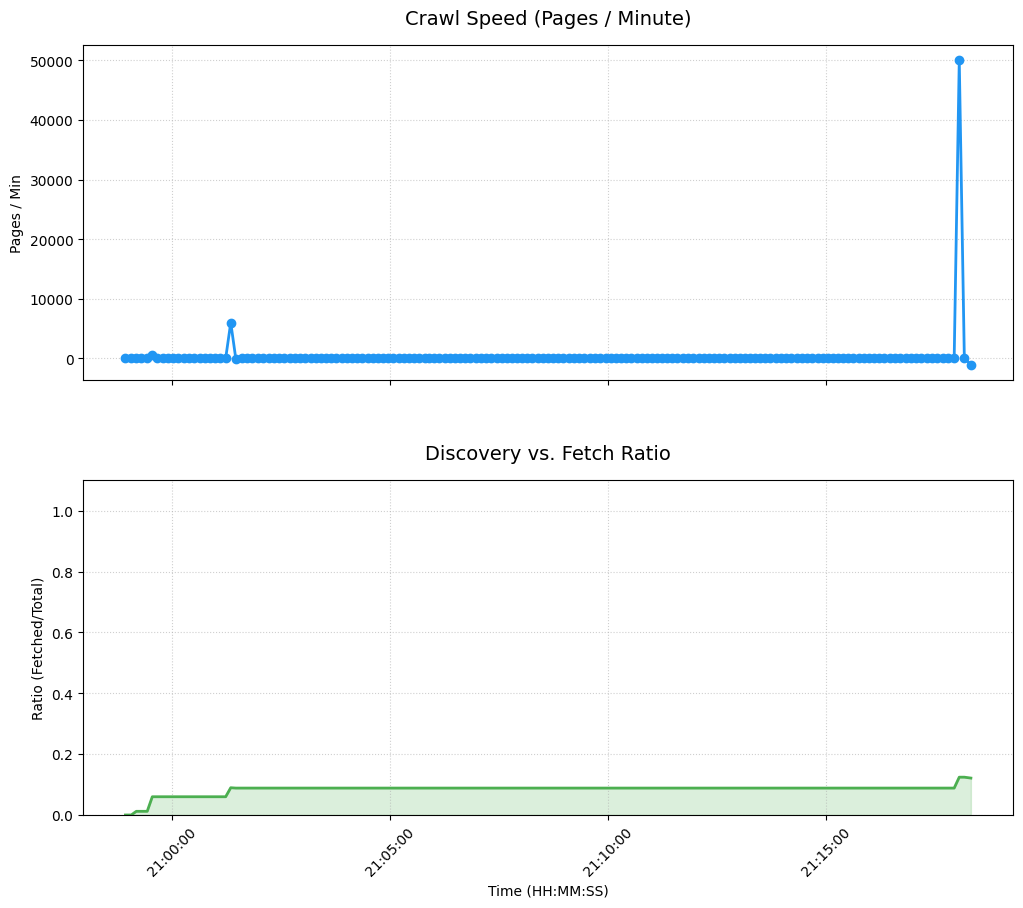

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.subplots_adjust(hspace=0.3)

# --- Plot 1: Crawl Speed ---
ax1.plot(df['datetime'], df['pages_per_min'], color='#2196F3', marker='o', linewidth=2, label='Speed')
ax1.set_title('Crawl Speed (Pages / Minute)', fontsize=14, pad=15)
ax1.set_ylabel('Pages / Min')
ax1.grid(True, linestyle=':', alpha=0.6)

# --- Plot 2: Fetch Progress ---
ax2.fill_between(df['datetime'], df['fetch_ratio'], color='#4CAF50', alpha=0.2)
ax2.plot(df['datetime'], df['fetch_ratio'], color='#4CAF50', linewidth=2, label='Progress Ratio')
ax2.set_title('Discovery vs. Fetch Ratio', fontsize=14, pad=15)
ax2.set_ylabel('Ratio (Fetched/Total)')
ax2.set_ylim(0, 1.1) # Ratios stay between 0 and 1
ax2.grid(True, linestyle=':', alpha=0.6)

# Formatting the X-axis for readable Time
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.xlabel('Time (HH:MM:SS)')

plt.show()

In [38]:
# Extract final values from the last row of your dataframe
final_row = df.iloc[-1]

summary = {
    "Total Duration (min)": f"{df['duration_sec'].iloc[0] / 60:.2f}",
    "Final Pages Fetched": int(final_row["pages_fetched"]),
    "Final Total URLs": int(final_row["pages_total"]),
    "Final Fetch Ratio": f"{final_row['fetch_ratio']:.2%}",
    "Peak Crawl Speed (p/min)": f"{df['pages_per_min'].max():.2f}",
    "Avg Crawl Speed (p/min)": f"{df['pages_per_min'].mean():.2f}"
}

# Create and display the summary table
summary_df = pd.DataFrame(summary, index=["Session Metrics"])

# Transpose for better readability (Vertical layout)
summary_df.T

,Session Metrics
Total Duration (min),19.43
Final Pages Fetched,6440
Final Total URLs,53099
Final Fetch Ratio,12.13%
Peak Crawl Speed (p/min),50040.00
Avg Crawl Speed (p/min),340.46


In [39]:
# Keyword extraction
BASE_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
p = Path(os.path.join(BASE_DIR, "output"))
filenames = [entry.name for entry in p.iterdir() if entry.is_file()]
for filename in filenames:
    print(filename)
    if "keywords" in filename:
        output_path = os.path.join(BASE_DIR, "output", f"{filename}")
        key_word_df = pd.read_csv(output_path)

def clean_and_count(text):
    if pd.isna(text): return 0
    # Remove punctuation and split
    text = str(text).translate(str.maketrans('', '', string.punctuation))
    return len(text.split())

# Apply to just the keywords column
key_word_df['keyword_count'] = key_word_df['keywords'].apply(clean_and_count)

# Or apply to the whole row
key_word_df['row_total_keywords'] = key_word_df.astype(str).apply(lambda row: clean_and_count(' '.join(row)), axis=1)


print(f"Total number of keywords: {key_word_df['keyword_count'].sum()}")
key_word_df.head(20)

crawl_stats.csv
part-r-00000_keywords.csv
Total number of keywords: 462887


,link,from_url,keywords,keyword_count,row_total_keywords
0,http:/,https://www.ventureatlanta.org/page/33/,READ MORE,2,5
1,http:/,https://www.ventureatlanta.org/page/2/,READ MORE,2,5
2,http:/,https://www.ventureatlanta.org/page/3/,READ MORE,2,5
3,http:/,https://www.ventureatlanta.org/,READ MORE,2,5
4,http:/,https://www.ventureatlanta.org/startup-showcas...,NaN,0,4
5,http:/,https://thearts.gsu.edu/profile/jeremy-bolen/,Student Organizations,2,5
6,http:/,https://www.ventureatlanta.org/event-overview/,SOLD OUT,2,5
7,http:/,https://www.ventureatlanta.org/who-we-are/,X,1,4
8,http:/,https://www.ventureatlanta.org/sponsor/,View Packages,2,5
9,http:/,https://www.dekalbcountyga.gov/chief-executive...,Business,1,4


# Reflection

This assignment was truly challenging for me, but it is also a really rewarding one. Figuring out implementation details and the actual way people use a crawler is something I won't learn in class. Coming from a ML/ React background, I am used to working with high level technology and having a variety sources of tutorial/ documentation. Nutch is a matured web crawling library, and many aspects of it feels "old-fashioned" engineering. For one, I had to go through multiple unrelated bugs to reallize that I need to be running in Java 11 environment (instead of the newest jdk 21). Also, there is no high quality tutorial video and I often encounter cs jargon that feels unfamiliar.

I re-learned the habit of reading documentation (rather than just chat-gpt) on the CLI details, and debug version conflicts and ambiguous documentation like an true computer engineer. I felt proud completing this project, and I beleive this project provides me a strong foundation in future system level engineering tasks.

The crawl time is really inconsistent, mainly because of the Nutch's "polite protocol". It enforces a delay time when encountering the same website, and also limits the number of connection per host. I ran the same process 2 different times, and got slightly different run time. I opened up multiple threads to crawl, but the runtime often got bottlenecked by one or two specific website. With my average page crawl time of 340 pages/ minutes, I estimate that it will take 10 mil / 340 = 29411 minutes = 20 days to crawl 10 million pages, and project toed to 2000 days = 5.6 years to crawl 1 billion pages. However, this time can be off by some margin due to internet connection and Nutch's protocol. As more and more pages is crawled, the runtime is likely going to grow non-linearly due to more pages having robot.txt.

